# Data of a cylinder model with induced magnetization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from visual import histeq
from copy import deepcopy
from fatiando import utils
from fatiando.mesher import PolygonalPrism
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from fatiando.gridder import regular
from fatiando.gravmag import polyprism

import sys
sys.path.insert(0, '../magnetic-radial-inversion/code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
with open('data/cylinder_model.pickle') as w:
        cylinder_model = pickle.load(w)
with open('data/regular_grid.pickle') as w:
        regular_grid = pickle.load(w)

In [3]:
cylinder_data = dict()

In [4]:
cylinder_data['data'] = polyprism.tf(regular_grid['xp'], regular_grid['yp'], regular_grid['zp'], \
                           cylinder_model['prisms'], cylinder_model['inc'], cylinder_model['dec']) # predict data

cylinder_data['data_noise'] = cylinder_data['data'] + np.random.normal(loc=0., scale=5.,\
                               size=regular_grid['shape'][0]*regular_grid['shape'][1]) # noise corrupted data

In [5]:
r = np.linspace(10., 1000., 20)
z0 = np.linspace(-100., 500., 20)
r,z0 = np.meshgrid(r, z0)
r = r.ravel()
z0 = z0.ravel()

In [6]:
phi = np.zeros_like(r)

In [7]:
for i, (rn, z) in enumerate(zip(r,z0)):
    m = np.zeros(cylinder_model['M']) + rn
    m = np.hstack((m,np.zeros(2)))
    l = mfun.param2polyprism(m, cylinder_model['M'], cylinder_model['L'], z, cylinder_model['dz'],
                                 cylinder_model['props'])
    d_pred = polyprism.tf(regular_grid['xp'], regular_grid['yp'], regular_grid['zp'],
                                l, cylinder_model['inc'], cylinder_model['dec'])
    phi[i] = np.sum((cylinder_data['data'] - d_pred)**2)

        

In [8]:
phi.shape

(400,)

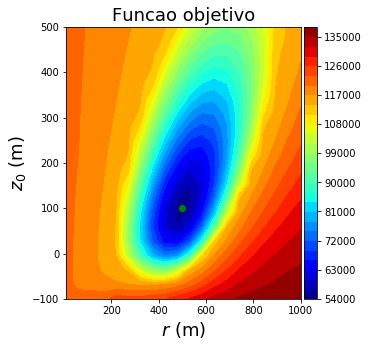

In [9]:
r = r.reshape((20,20))
z0 = z0.reshape((20,20))
phi = phi.reshape((20,20))

cylinder_data['p1'] = r
cylinder_data['p2'] = z0
cylinder_data['phi'] = phi

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(20,20))
cylinder_data['phi_eq'] = phi_eq

plt.figure(figsize=(5,5))
plt.plot(500., 100., 'og')
plt.title('Funcao objetivo', fontsize=18)
plt.contourf(r, z0, phi_eq, 30, cmap='jet')
plt.xlabel('$r$ (m)', fontsize=18)
plt.ylabel('$z_0$ (m)', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_geo_prob.png', pad_inches=0.0)
plt.show()

In [10]:
file_name = 'data/cylinder_data.pickle'
with open(file_name, 'w') as f:
    pickle.dump(cylinder_data, f)